In [490]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df = pd.read_csv("bank.csv", sep=',')  
pd.set_option("display.max_columns", None)

In [491]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [492]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [493]:
#check for duplicates
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [495]:
#check integer columns
df_count = df.select_dtypes(include = 'number')
df_count   


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


In [496]:
#convert object to category 
cat_cols = ['job', 'marital', 'education', 
            'loan', 'contact', 'month', 'poutcome', 'deposit']

df[cat_cols] = df[cat_cols].astype('category')


In [497]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Check columns unique values

In [499]:
df['job'].unique()

['admin.', 'technician', 'services', 'management', 'retired', ..., 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']

In [500]:
df['marital'].unique()

['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']

In [501]:
df['education'].unique()

['secondary', 'tertiary', 'primary', 'unknown']
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']

In [502]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [503]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [504]:
df['loan'].unique()

['no', 'yes']
Categories (2, object): ['no', 'yes']

In [505]:
# clean all categorical string values
for col in df.select_dtypes(include='category').columns:
    df[col] = df[col].astype(str).str.strip().str.lower().str.replace('.', '', regex=False)


In [506]:
df['job'].unique()

array(['admin', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [507]:
#check for outliers
df[['balance', 'duration', 'pdays', 'campaign']].describe()

,balance,duration,pdays,campaign
count,11162.000000,11162.000000,11162.000000,11162.000000
mean,1528.538524,371.993818,51.330407,2.508421
std,3225.413326,347.128386,108.758282,2.722077
min,-6847.000000,2.000000,-1.000000,1.000000
25%,122.000000,138.000000,-1.000000,1.000000
50%,550.000000,255.000000,-1.000000,2.000000
75%,1708.000000,496.000000,20.750000,3.000000
max,81204.000000,3881.000000,854.000000,63.000000


In [508]:
df[df['campaign'] > 20]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
563,38,entrepreneur,married,secondary,no,593,yes,yes,cellular,24,jul,1484,24,-1,0,unknown,yes
618,46,housemaid,married,secondary,no,271,yes,no,cellular,30,jul,1013,29,-1,0,unknown,yes
1217,28,technician,single,tertiary,no,4987,no,no,cellular,9,feb,253,21,-1,0,unknown,yes
4912,50,entrepreneur,married,primary,no,461,yes,no,unknown,15,may,651,32,-1,0,unknown,yes
5655,47,technician,married,tertiary,yes,-813,yes,yes,unknown,16,jun,179,25,-1,0,unknown,no
6052,40,management,married,tertiary,no,423,yes,no,cellular,30,jul,134,24,-1,0,unknown,no
6435,31,blue-collar,married,secondary,no,892,yes,no,cellular,29,jul,25,22,-1,0,unknown,no
6644,31,management,married,tertiary,no,256,yes,no,cellular,7,jul,28,24,-1,0,unknown,no
6904,42,blue-collar,married,secondary,no,351,yes,no,unknown,16,may,76,21,-1,0,unknown,no
6927,51,blue-collar,married,unknown,no,41,yes,no,telephone,9,jul,16,43,-1,0,unknown,no


In [509]:
# cap and flag high number of contacts
df['many_contacts'] = df['campaign'] > 20
df['campaign_capped'] = df['campaign'].clip(upper=20)

In [510]:
# flag if contacted before
df['contacted_before'] = df['pdays'].apply(lambda x: 0 if x == -1 else 1)

---
## EDA

In [512]:
# check deposit distribution values
df['deposit'].value_counts(normalize=True)



deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64

In [513]:
# categories values frequency
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    print(f"\n{col.upper()}:\n", df[col].value_counts())



JOB:
 job
management       2566
blue-collar      1944
technician       1823
admin            1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

MARITAL:
 marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

EDUCATION:
 education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

DEFAULT:
 default
no     10994
yes      168
Name: count, dtype: int64

HOUSING:
 housing
no     5881
yes    5281
Name: count, dtype: int64

LOAN:
 loan
no     9702
yes    1460
Name: count, dtype: int64

CONTACT:
 contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

MONTH:
 month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: i

### Distributions

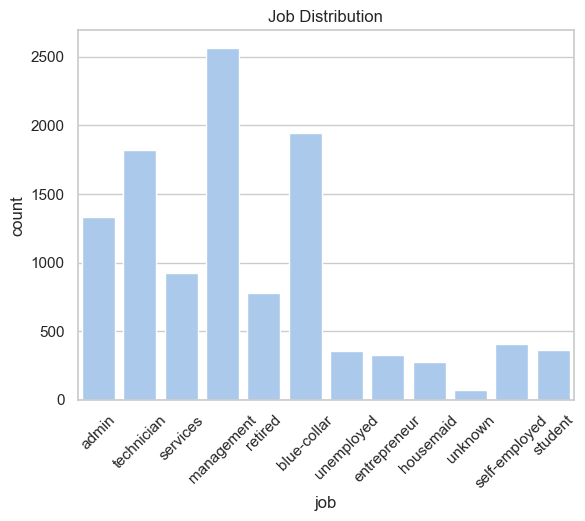

In [640]:
#job distribution 
sns.countplot(data=df, x='job', color='#A1C9F4')
plt.xticks(rotation=45)
plt.title('Job Distribution')
plt.savefig("visuals/job_distribution .png", dpi=300, bbox_inches='tight')
plt.show()

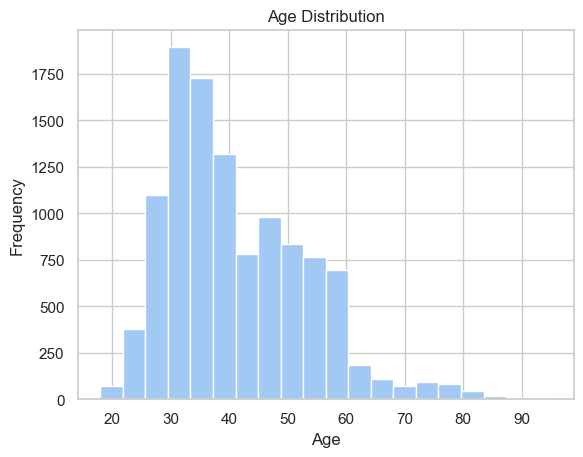

In [516]:
#age distribution 
df['age'].hist(bins=20, color='#A1C9F4')  
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig("visuals/age_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

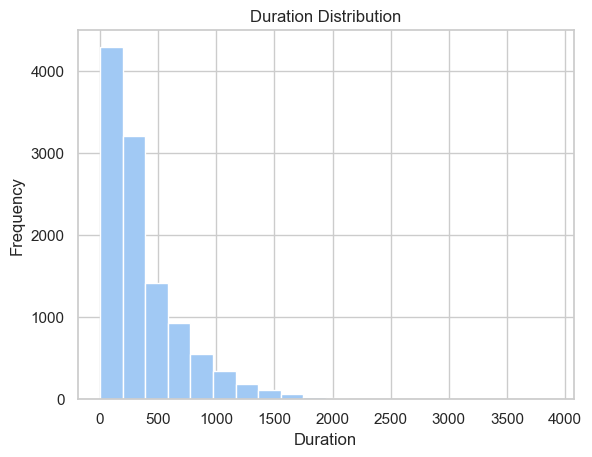

In [517]:
#duration distribution 
df['duration'].hist(bins=20, color='#A1C9F4')  
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.savefig("visuals/duration_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

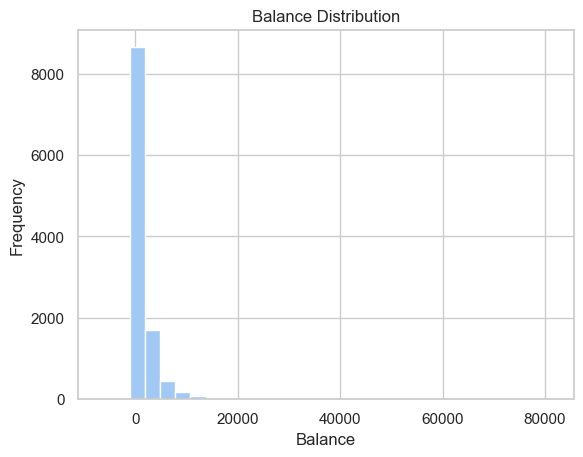

In [518]:
#balance distribution
df['balance'].hist(bins=30, color='#A1C9F4')  
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.savefig("visuals/balance_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

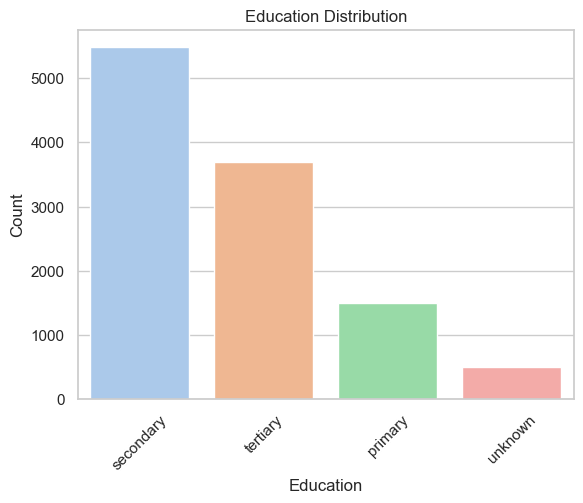

In [519]:
#education distribution 
sns.countplot(data=df, x='education', hue='education', palette='pastel')
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig("visuals/education_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

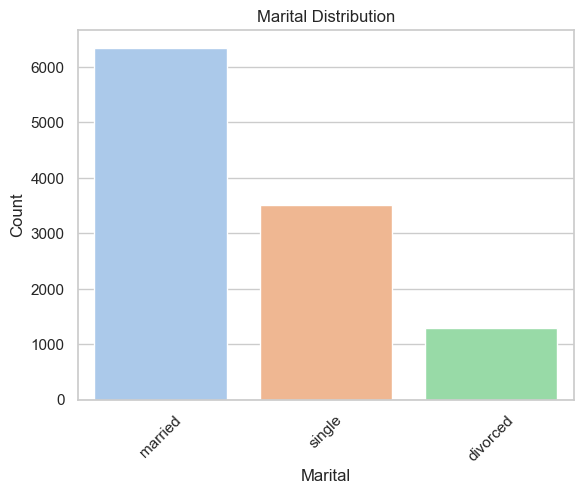

In [520]:
#marital distribution 
sns.countplot(data=df, x='marital', hue='marital', palette='pastel')
plt.title('Marital Distribution')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig("visuals/marital_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

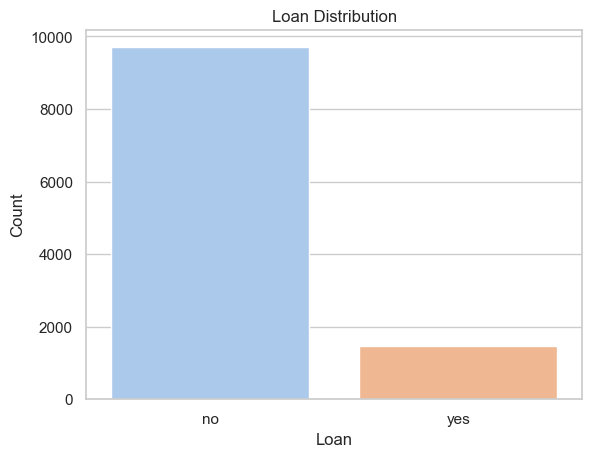

In [521]:
#loan distribution
sns.countplot(data=df, x='loan', hue='loan', palette='pastel', legend=False)  
plt.title('Loan Distribution')
plt.xlabel('Loan')
plt.ylabel('Count')
plt.savefig("visuals/loan_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

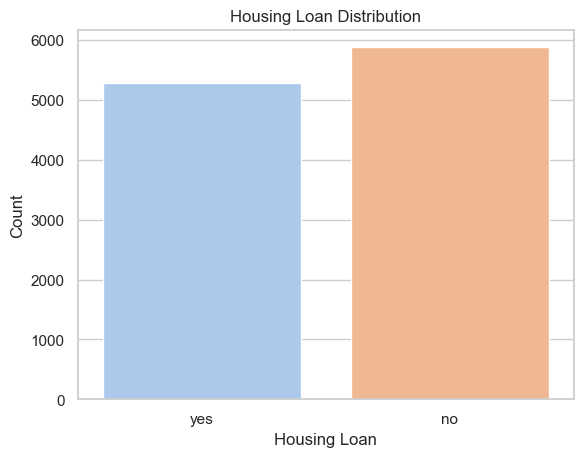

In [522]:
#housing distribution
sns.countplot(data=df, x='housing', hue='housing', palette='pastel', legend=False)
plt.title('Housing Loan Distribution')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.savefig("visuals/housing_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

## Variables vs Target

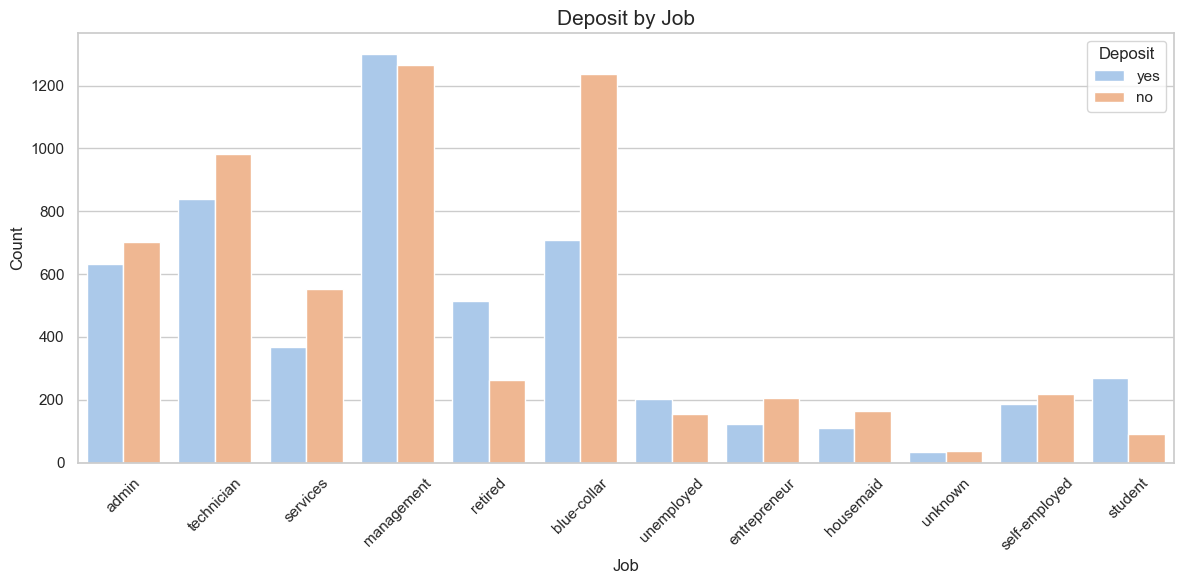

In [524]:
#deposit by job
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='deposit', palette='pastel')  
plt.title('Deposit by Job', fontsize=15)
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Deposit')
plt.tight_layout()
plt.savefig("visuals/deposit_by_job.png", dpi=300, bbox_inches='tight')
plt.show()

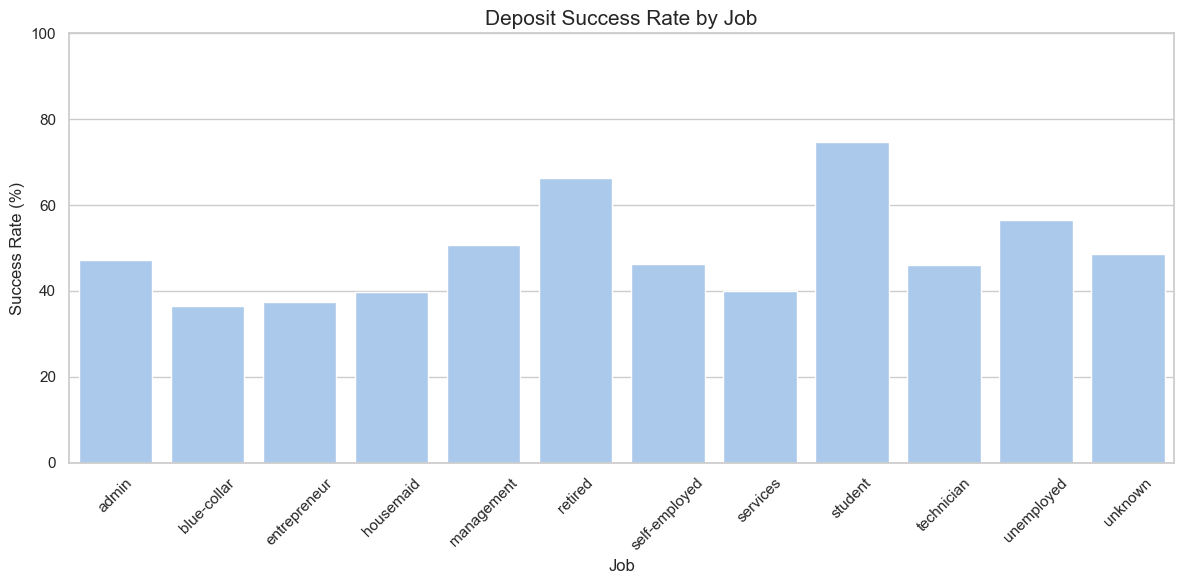

In [525]:
#deposit success rate by job
job_success_rate = df.groupby('job')['deposit'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 6))
sns.barplot(x=job_success_rate.index, y=job_success_rate['yes'] * 100, color='#A1C9F4')  
plt.title('Deposit Success Rate by Job', fontsize=15)
plt.ylabel('Success Rate (%)')
plt.xlabel('Job')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig("visuals/deposit_sucess_rate_by_job.png", dpi=300, bbox_inches='tight')
plt.show()

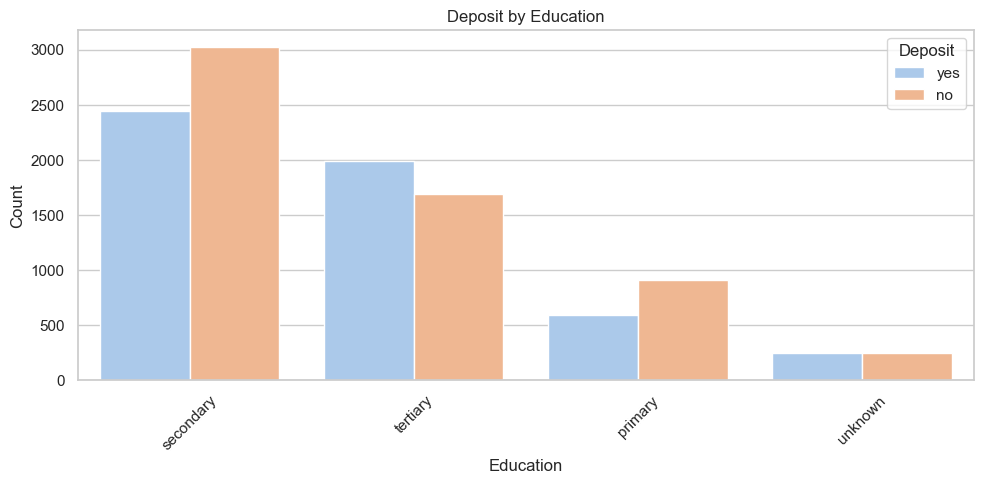

In [526]:
#deposit by education
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='education', hue='deposit', palette='pastel')  
plt.title('Deposit by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Deposit')
plt.tight_layout()
plt.savefig("visuals/deposit_by_education.png", dpi=300, bbox_inches='tight')
plt.show()

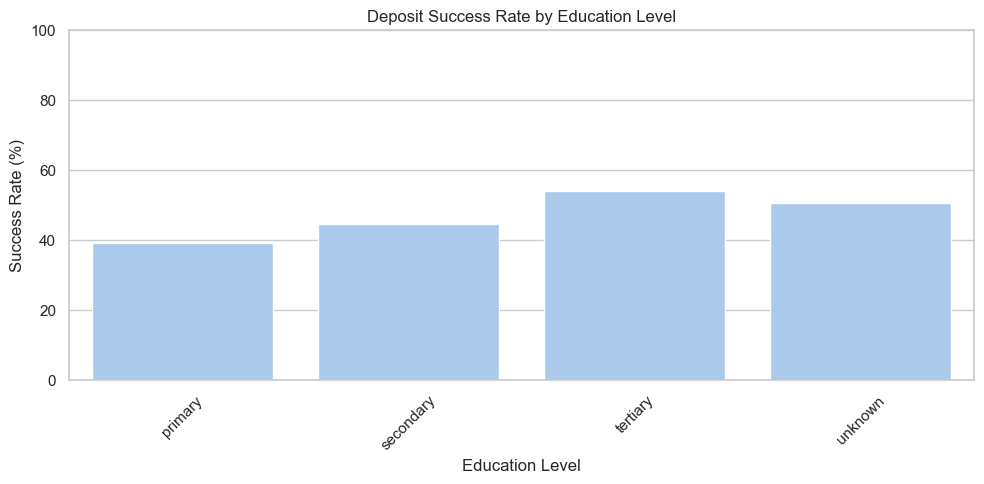

In [527]:
#deposit success rate by education
education_success_rate = df.groupby('education')['deposit'].value_counts(normalize=True).unstack()

plt.figure(figsize=(10, 5))
sns.barplot(x=education_success_rate.index, y=education_success_rate['yes'] * 100, color='#A1C9F4')
plt.title('Deposit Success Rate by Education Level')
plt.ylabel('Success Rate (%)')
plt.xlabel('Education Level')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("visuals/deposit_sucess_rate_by_education.png", dpi=300, bbox_inches='tight')
plt.show()

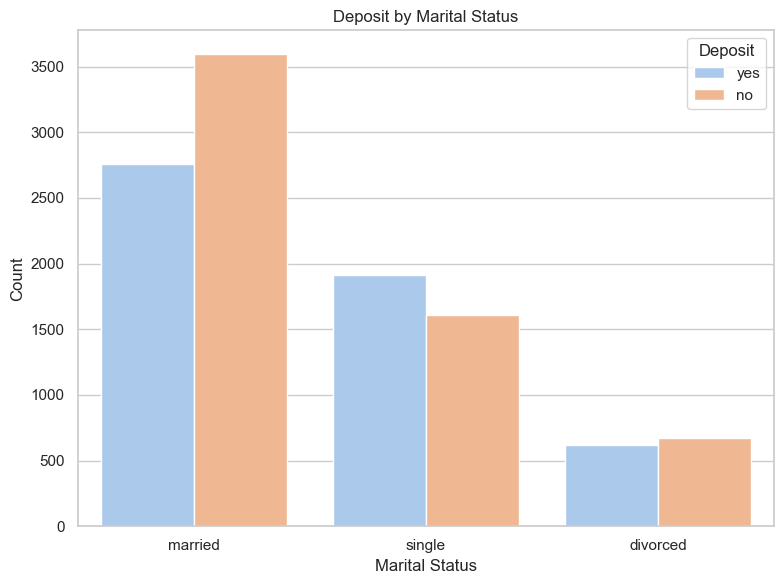

In [528]:
#deposit by marital
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='marital', hue='deposit', palette='pastel')
plt.title('Deposit by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Deposit')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("visuals/deposit_by_marital.png", dpi=300, bbox_inches='tight')
plt.show()

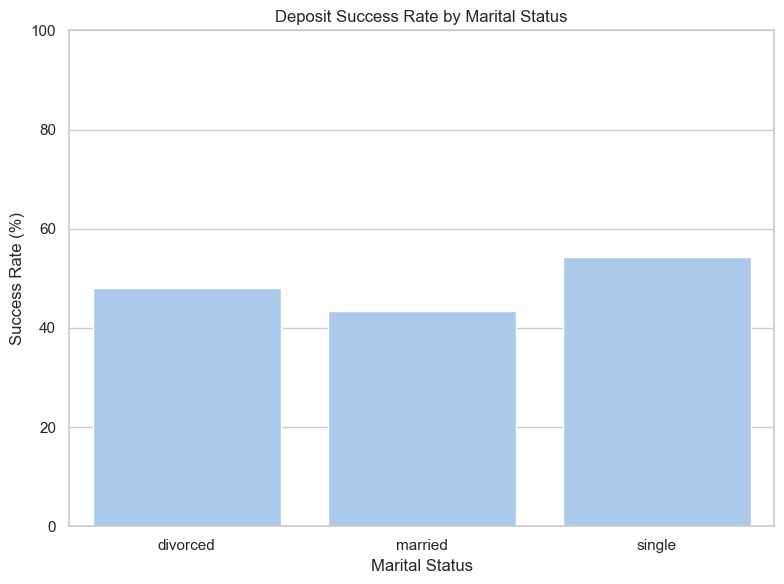

In [529]:
#deposit success rate by marital
marital_success_rate = df.groupby('marital')['deposit'].value_counts(normalize=True).unstack()

plt.figure(figsize=(8, 6))
sns.barplot(x=marital_success_rate.index, y=marital_success_rate['yes'] * 100, color='#A1C9F4')
plt.title('Deposit Success Rate by Marital Status')
plt.ylabel('Success Rate (%)')
plt.xlabel('Marital Status')
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig("visuals/deposit_sucess_rate_by_marital.png", dpi=300, bbox_inches='tight')
plt.show()

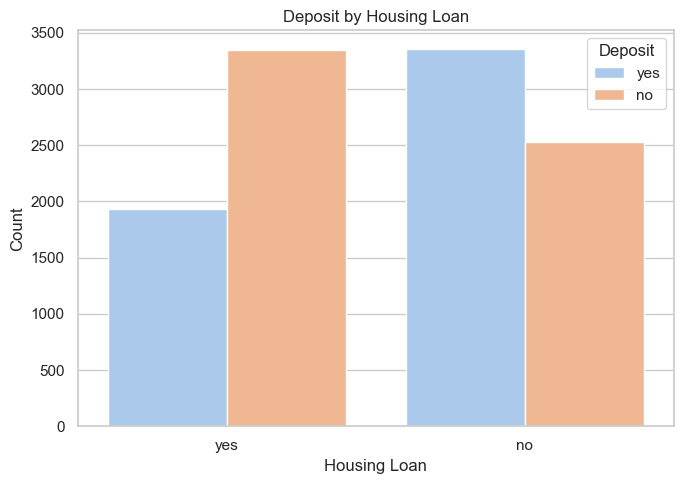

In [530]:
#deposit by housing
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='housing', hue='deposit', palette='pastel')
plt.title('Deposit by Housing Loan')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.legend(title='Deposit')
plt.tight_layout()
plt.savefig("visuals/deposit_by_housing.png", dpi=300, bbox_inches='tight')
plt.show()

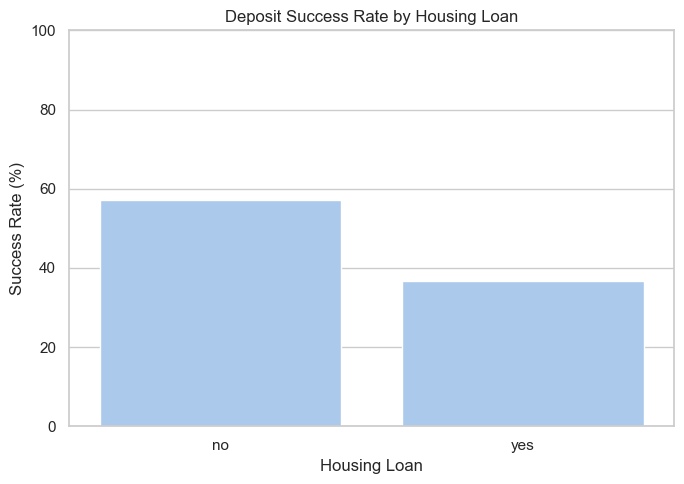

In [531]:
#deposit success rate by hosing
housing_success_rate = df.groupby('housing')['deposit'].value_counts(normalize=True).unstack()

plt.figure(figsize=(7, 5))
sns.barplot(x=housing_success_rate.index, y=housing_success_rate['yes'] * 100, color='#A1C9F4')
plt.title('Deposit Success Rate by Housing Loan')
plt.ylabel('Success Rate (%)')
plt.xlabel('Housing Loan')
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig("visuals/deposit_sucess_rate_by_housing.png", dpi=300, bbox_inches='tight')
plt.show()

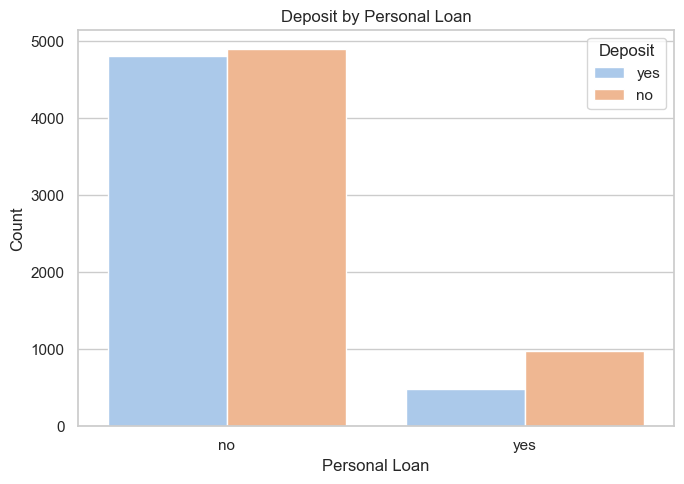

In [532]:
#deposit by loan
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='loan', hue='deposit', palette='pastel')
plt.title('Deposit by Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.legend(title='Deposit')
plt.tight_layout()
plt.savefig("visuals/deposit_by_loan.png", dpi=300, bbox_inches='tight')
plt.show()

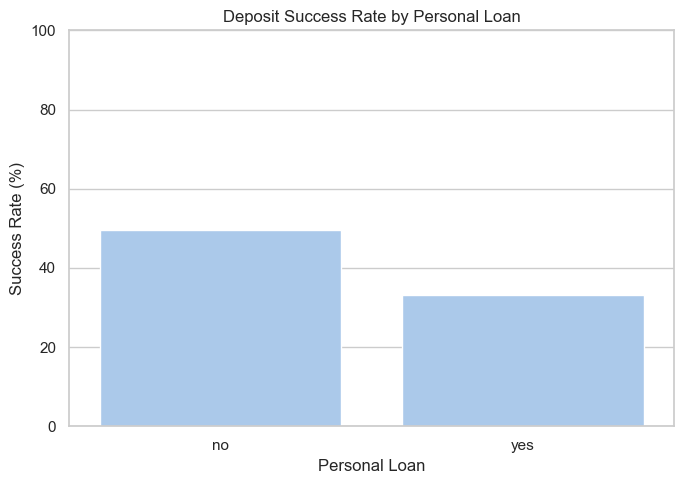

In [533]:
#deposit success rate by loan
loan_success_rate = df.groupby('loan')['deposit'].value_counts(normalize=True).unstack()

# Plot success rate
plt.figure(figsize=(7, 5))
sns.barplot(x=loan_success_rate.index, y=loan_success_rate['yes'] * 100, color='#A1C9F4')
plt.title('Deposit Success Rate by Personal Loan')
plt.ylabel('Success Rate (%)')
plt.xlabel('Personal Loan')
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig("visuals/deposit_sucess_rate_by_loan.png", dpi=300, bbox_inches='tight')
plt.show()

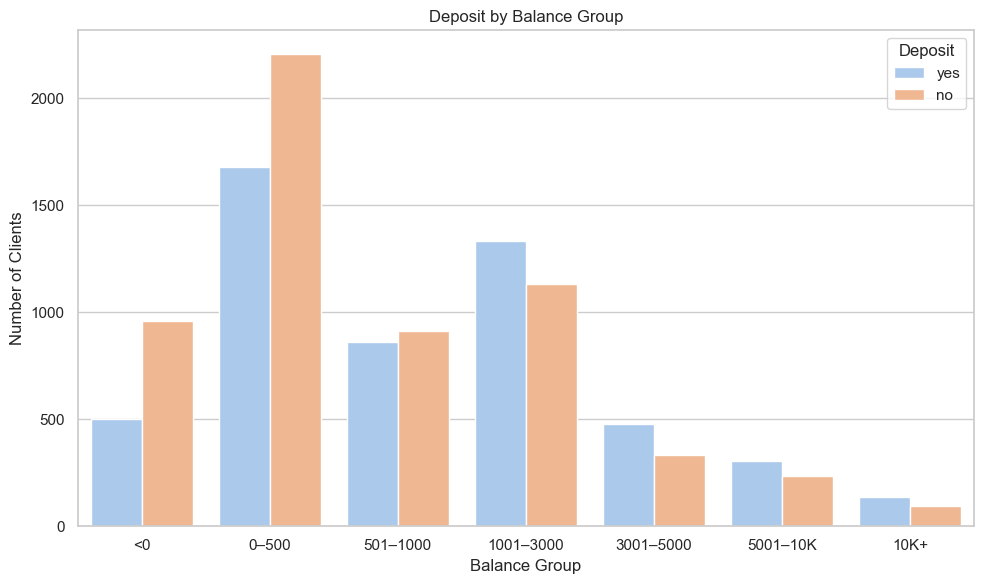

In [663]:
#deposit by balance
balance_bins = [-5000, 0, 500, 1000, 3000, 5000, 10000, df["balance"].max()]
labels = ['<0', '0–500', '501–1000', '1001–3000', '3001–5000', '5001–10K', '10K+']
df["balance_group"] = pd.cut(df["balance"], bins=balance_bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="balance_group", hue="deposit", palette="pastel")
plt.title("Deposit by Balance Group")
plt.xlabel("Balance Group")
plt.ylabel("Number of Clients")
plt.legend(title="Deposit")
plt.tight_layout()
plt.savefig("visuals/deposit_by_balance_group.png", dpi=300, bbox_inches="tight")
plt.show()

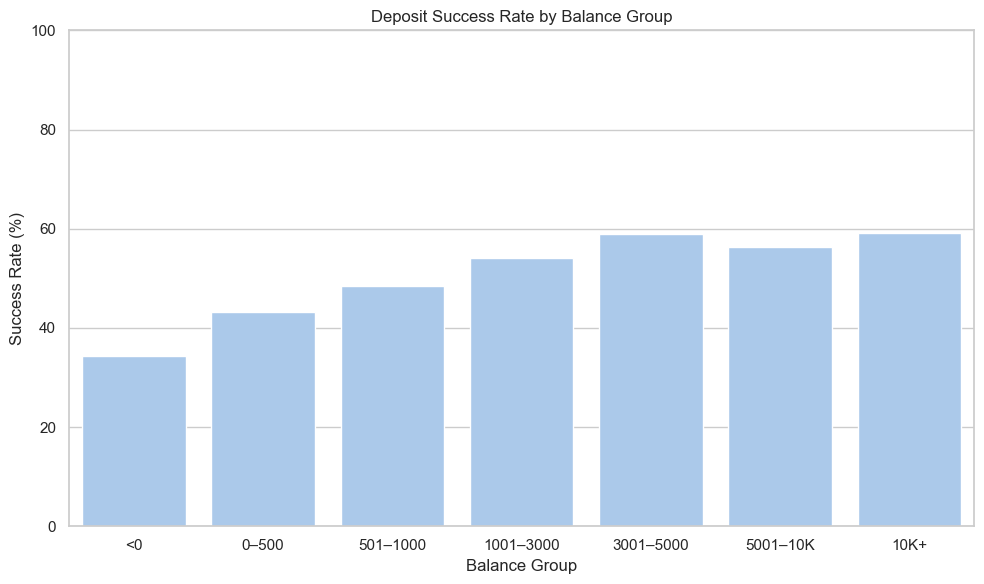

In [667]:
#deposit success rate by balance
success_rate = df.groupby("balance_bin", observed=True)["deposit"].value_counts(normalize=True).unstack()

plt.figure(figsize=(10, 6))
sns.barplot(x=success_rate.index, y=success_rate["yes"] * 100, color="#A1C9F4")
plt.title("Deposit Success Rate by Balance Group")
plt.xlabel("Balance Group")
plt.ylabel("Success Rate (%)")
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig("visuals/deposit_success_rate_by_balance_group.png", dpi=300, bbox_inches='tight')
plt.show()

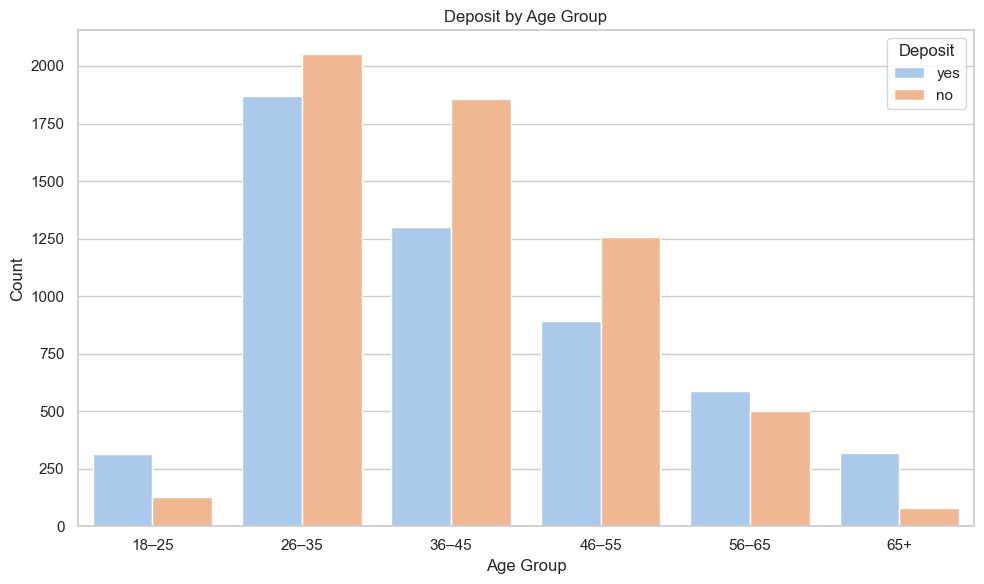

In [648]:
#deposit by age
age_bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65', '65+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=labels, right=True)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='deposit', palette='pastel')
plt.title('Deposit by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Deposit')
plt.tight_layout()
plt.savefig("visuals/deposit_by_age_group.png", dpi=300, bbox_inches='tight')
plt.show()

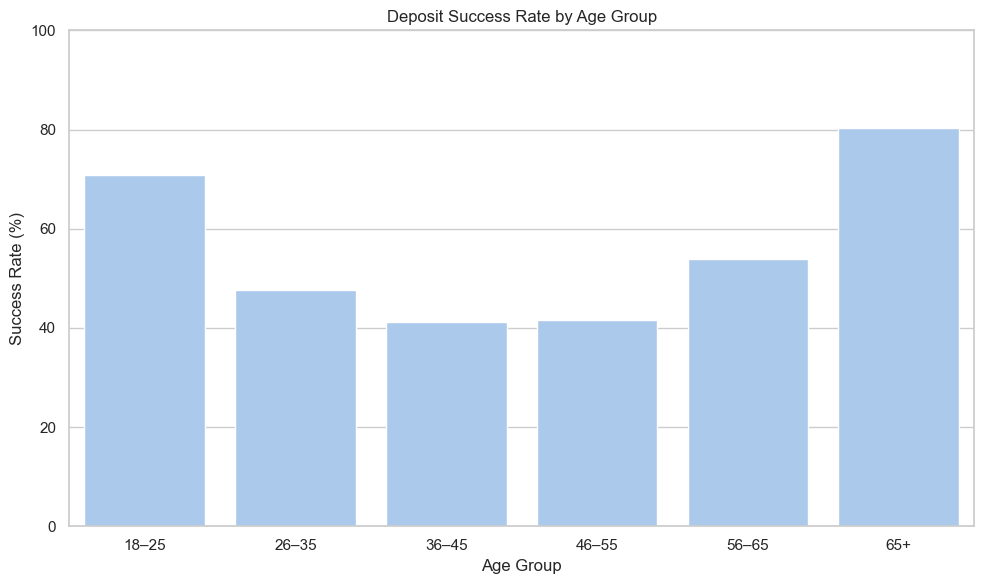

In [650]:
#deposit success rate by age
age_success_rate = df.groupby('age_group', observed=True)['deposit'].value_counts(normalize=True).unstack()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_success_rate.index, y=age_success_rate['yes'] * 100, color='#A1C9F4')
plt.title('Deposit Success Rate by Age Group')
plt.ylabel('Success Rate (%)')
plt.xlabel('Age Group')
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig("visuals/deposit_sucess_rate_by_age_group.png", dpi=300, bbox_inches='tight')
plt.show()

## Insights:
I looked at how different customer features (like age, job, and loan status) relate to whether or not they subscribed to a term deposit.


### Job vs Deposit
- **Students and retirees** had the highest subscription success rates.
- **Blue-collar** and **self-employed** clients had notably lower conversion rates.


### Education vs Deposit
- Clients with **tertiary education** showed a slightly higher subscription rate.
- But, since subscriptions happened across all education levels, **education doesn’t seem to make a big difference on its own.**


### Marital Status vs Deposit
- **Single** clients were more likely to subscribe compared to married or divorced clients.


### Loans vs Deposits
- People **without housing or personal loans** were more likely to subscribe to a term deposit.
- This pattern suggests that clients with **fewer financial obligations** may feel more confident committing to a deposit product.

## Balance vs Deposit
- Clients with **higher account balances** were much **more likely** to subscribe to a term deposit.

### Age Group vs Deposit
- People aged **18–25** and **65+** were the most likely to say yes to the deposit.
- Even though most clients were between **26** and **55**, they were actually less likely to subscribe.


---

## Campaign

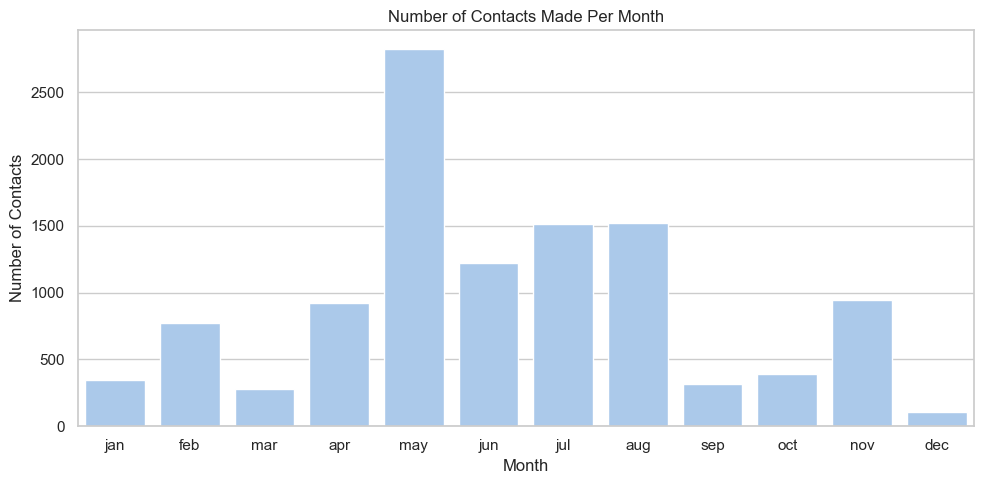

In [538]:
#contact per month 
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

monthly_contacts = df['month'].value_counts().reindex(month_order)

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_contacts.index, y=monthly_contacts.values, color='#A1C9F4')
plt.title('Number of Contacts Made Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Contacts')
plt.tight_layout()
plt.savefig("visuals/contacts_per_month.png", dpi=300, bbox_inches='tight')
plt.show()

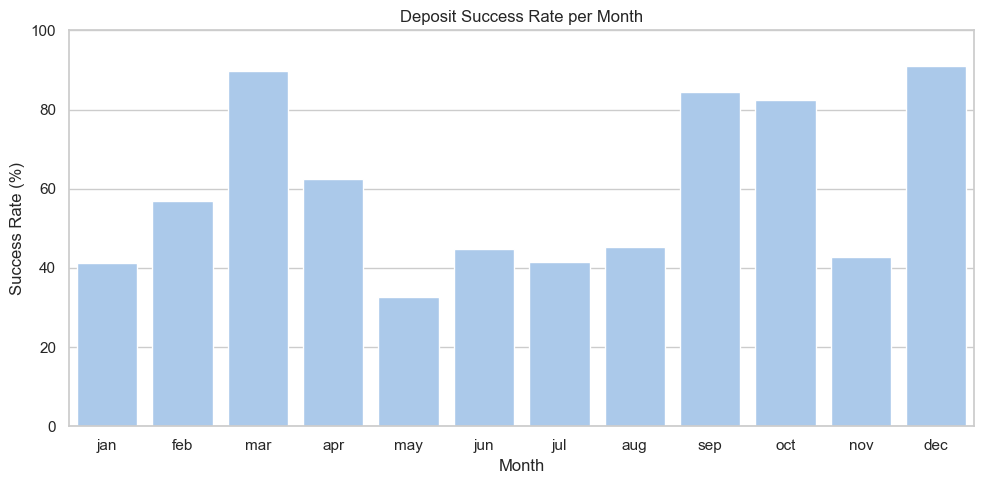

In [539]:
#deposit success rate per month 
month_success_rate = df.groupby('month')['deposit'].value_counts(normalize=True).unstack().reindex(month_order)

plt.figure(figsize=(10, 5))
sns.barplot(x=month_success_rate.index, y=month_success_rate['yes'] * 100, color='#A1C9F4')
plt.title('Deposit Success Rate per Month')
plt.ylabel('Success Rate (%)')
plt.xlabel('Month')
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig("visuals/deposit_sucess_rate_per_month.png", dpi=300, bbox_inches='tight')
plt.show()

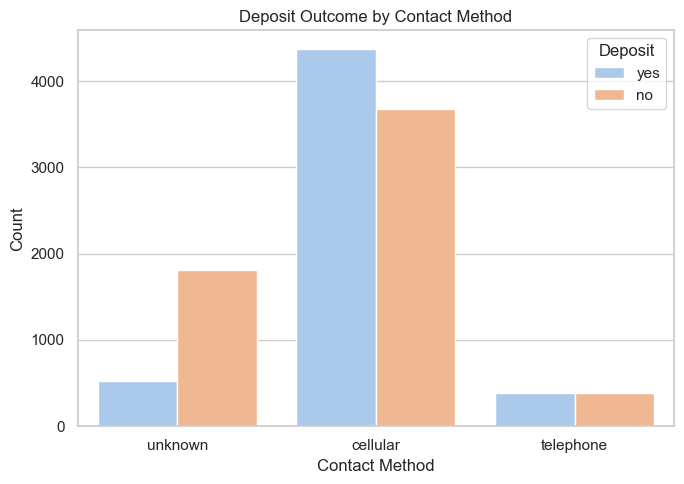

In [540]:
#deposit by contact method
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='contact', hue='deposit', palette='pastel')
plt.title('Deposit Outcome by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.legend(title='Deposit')
plt.tight_layout()
plt.savefig("visuals/deposit_by_contact_method.png", dpi=300, bbox_inches='tight')
plt.show()

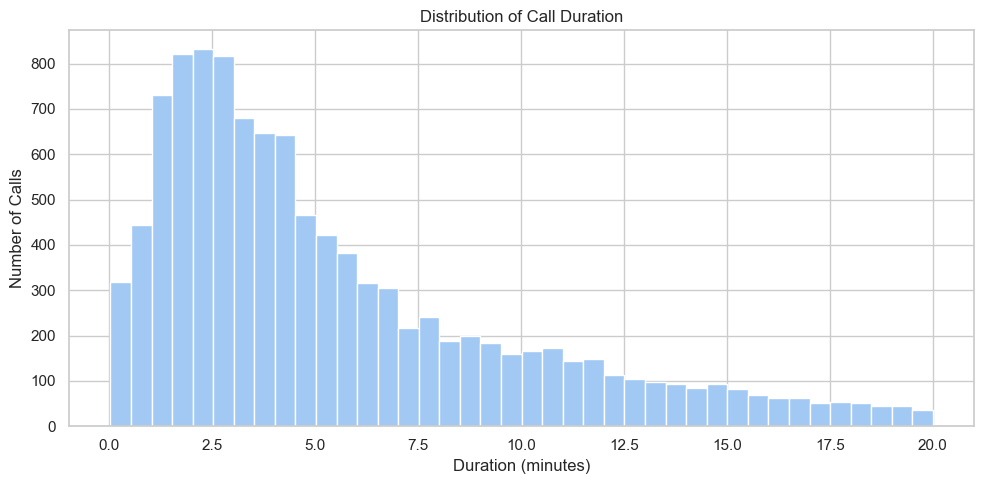

In [541]:
#call duration
df['duration_min'] = df['duration'] / 60

filtered_df = df[df['duration_min'] <= 20] #remove outliers

plt.figure(figsize=(10, 5))
filtered_df['duration_min'].hist(bins=40, color='#A1C9F4')
plt.title('Distribution of Call Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Calls')
plt.tight_layout()
plt.savefig("visuals/call_duration_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

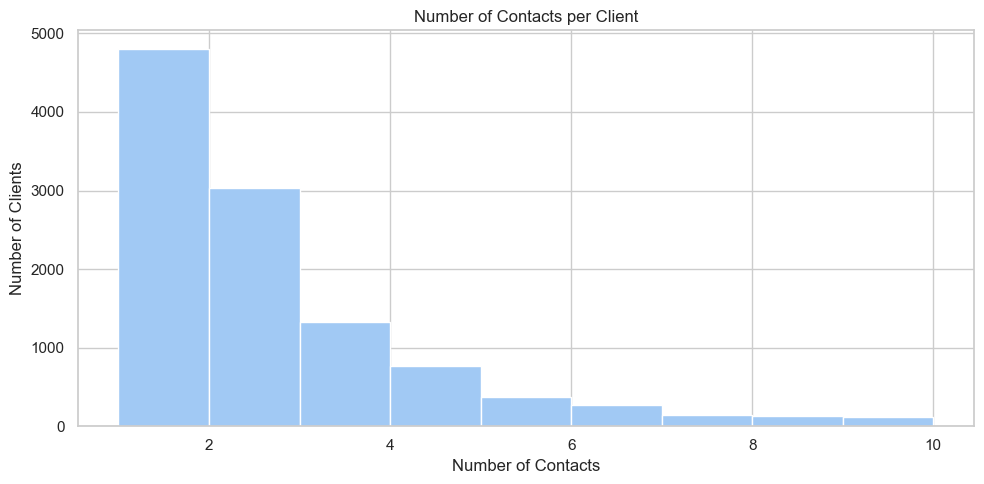

In [542]:
#times contacted
plt.figure(figsize=(10, 5))
df['campaign'].hist(bins=range(1, 11), color='#A1C9F4')
plt.title('Number of Contacts per Client')
plt.xlabel('Number of Contacts')
plt.ylabel('Number of Clients')
plt.tight_layout()
plt.savefig("visuals/contacts_per_client.png", dpi=300, bbox_inches='tight')
plt.show()

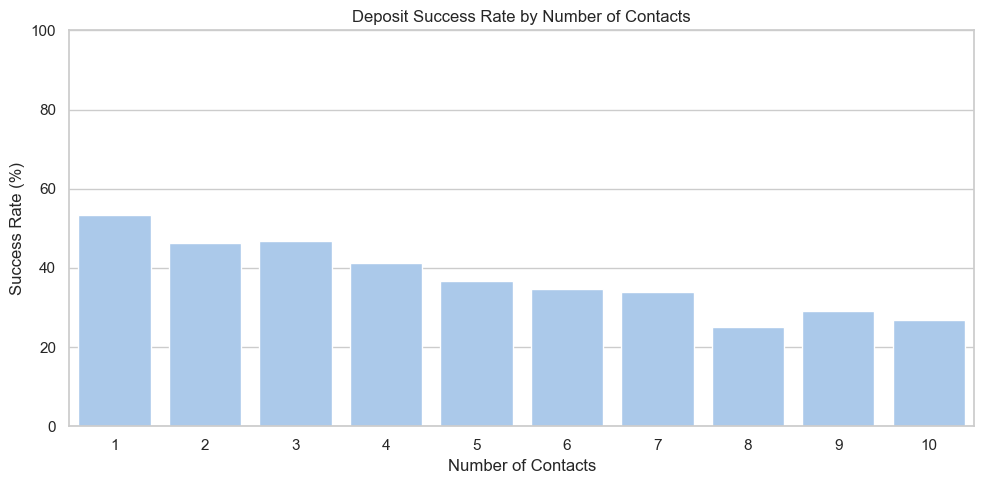

In [543]:
#deposit success rate by number of contacts
df_limited = df[df['campaign'] <= 10]

campaign_success = df_limited.groupby('campaign')['deposit'].value_counts(normalize=True).unstack()

plt.figure(figsize=(10, 5))
sns.barplot(x=campaign_success.index, y=campaign_success['yes'] * 100, color='#A1C9F4')
plt.title('Deposit Success Rate by Number of Contacts')
plt.xlabel('Number of Contacts')
plt.ylabel('Success Rate (%)')
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig("visuals/deposit_sucess_rate_by_contacts.png", dpi=300, bbox_inches='tight')
plt.show()

## Insights:


### Months 
- Clients contacted **only once** had the **highest success rate**.
- The more times a client was contacted, the **lower the chance they said "yes".


### Contact Method
- **Cellular** was by far the **most used** contact method in the campaign.
- A good number of entries are labeled as "unknown", possibly due to missing info or untracked contact methods.


### Call Duration
- Most calls were **under 5 minutes**, with a sharp drop after that.
- The **highest success rate** was observed in calls lasting around **2 to 3 minutes.**

### Number of Contacts
- The campaign was **heavily concentrated in May**, despite having the **lowest sucess rate.**
- Months with the **highest success rates** were **March, October, and December,** even though **few clients were contacted.**


---

## Modeling 

In this section, I trained and evaluated two machine learning models to predict whether a client would subscribe to a term deposit. The two models used were:

- **Logistic Regression** (baseline)
- **Random Forest Classifier** (final selected model)

I prepared the data, trained the models, evaluated their performance, and visualized feature importance to understand what drives client decisions.


In [546]:
#upload libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [547]:
#prepare data
df_model = df.copy()
df_model = df_model.drop(columns=['duration', 'duration_min', 'campaign_capped'])
df_model['deposit'] = df_model['deposit'].map({'yes': 1, 'no': 0})
df_model = pd.get_dummies(df_model, drop_first=True)
df_model.rename(columns={'housing_yes': 'has_housing_loan'}, inplace=True)
df_model.head()

,age,balance,day,campaign,pdays,previous,deposit,many_contacts,contacted_before,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,has_housing_loan,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,age_group_26–35,age_group_36–45,age_group_46–55,age_group_56–65,age_group_65+
0,59,2343,5,1,-1,0,1,False,0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False
1,56,45,5,1,-1,0,1,False,0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False
2,41,1270,5,1,-1,0,1,False,0,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False
3,55,2476,5,1,-1,0,1,False,0,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
4,54,184,5,2,-1,0,1,False,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False


In [548]:
# split
X = df_model.drop(columns='deposit')
y = df_model['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [549]:
#logistic regression
model = LogisticRegression(max_iter=5000, solver='saga')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [550]:
#evaluate logistic regression
print(confusion_matrix(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

[[950 216]
 [683 384]]


,precision,recall,f1-score,support
0,0.581751,0.814751,0.678814,1166.000000
1,0.640000,0.359888,0.460708,1067.000000
accuracy,0.597403,0.597403,0.597403,0.597403
macro avg,0.610876,0.587319,0.569761,2233.000000
weighted avg,0.609584,0.597403,0.574596,2233.000000


In [551]:
#ramdom forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [552]:
#evaluate ramdom forest
print(confusion_matrix(y_test, y_pred_rf))
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
pd.DataFrame(report_rf).transpose()

[[946 220]
 [388 679]]


,precision,recall,f1-score,support
0,0.709145,0.811321,0.756800,1166.000000
1,0.755284,0.636364,0.690743,1067.000000
accuracy,0.727721,0.727721,0.727721,0.727721
macro avg,0.732215,0.723842,0.723771,2233.000000
weighted avg,0.731192,0.727721,0.725236,2233.000000


Random Forest did a better job than Logistic Regression at predicting which clients would subscribe.

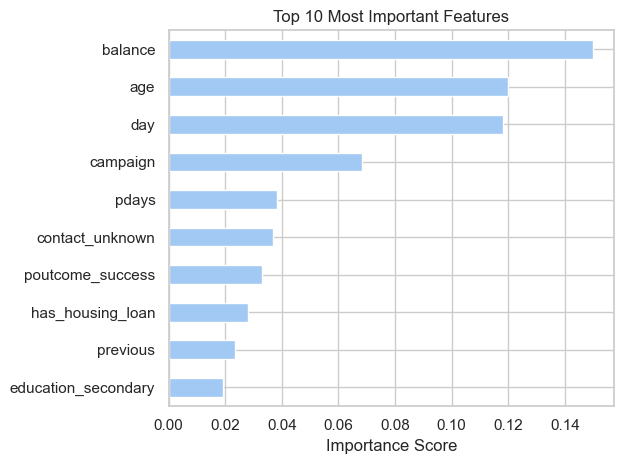

In [554]:
importance = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = importance.sort_values(ascending=False).head(10)

top_features.plot(kind='barh', color='#A1C9F4')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("visuals/top_10_features.png", dpi=300, bbox_inches='tight')
plt.show()

## Modeling Insights and Top Feature Interpretation

After training a Random Forest Classifier to predict whether a client would subscribe to a term deposit, I analyzed the top 10 most important features based on their contribution to model performance.

These features do not indicate whether they increse or decrease the likelihood of a deposit — only that they played a strong role in helping the model make accurate splits. **Interpretation of directionality was supported by prior exploratory analysis (EDA).**


### Most Predictive Features:

- **balance**: Clients with higher account balances were significantly more likely to subscribe — financial stability plays a key role.
- **age**: Age impacted outcomes, likely reflecting different financial goals or risk tolerance across life stages.
- **day**: The specific day of the month the client was contacted may align with behavioral trends like salary or budgeting cycles.

These insights suggest that marketing strategies could benefit from targeting financially stable clients, segmenting by age group, and carefully timing outreach for better conversion rates.



---
## Conclusion

This analysis offered meaningful insights into customer behavior and campaign effectiveness, identifying key drivers behind successful deposit subscriptions. It highlights how combining EDA with machine learning can support more informed, data-driven marketing decisions.